<h2>FIN5615 Project #3
    <p class="text-primary">Random Walk Simulaton (Part II)</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will try to address some of the shortcomings of modeling stock price as a simple random walk. We will compare the simulated option prices from our random walk model against that of the Black-Scholes options pricing formula.
    </div>
</div>
<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Recall the random walk simulation we built to model Ford's stock price from the previous project:
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times u = X_te^{\sigma\sqrt{h}} & \quad p = \frac{e^{rh} - d}{u - d} \\
            X_t \times d = X_te^{-\sigma\sqrt{h}} & \quad 1 - p
        \end{array}
    \right.$$ 
    <br><br>Where we assumed that the annual volatility of F's returns is 10% and a risk-free rate of 1%, and simulated the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.
    <br><br>Rerun that simulation using the code provided below.
    <br><br>The simulation is stored in the variable <code>sims</code>. Check that <code>sims</code> is a list of length 1000 (i.e. 1000 trials), with each element being a list of length 251 (i.e. price at time 0 plus 250 future time steps).
    </div>
</div>

### Q.No. 1.1 The simulation is stored in the variable sims. Check that sims is a list of length 1000 (i.e. 1000 trials), with each element being a list of length 251 (i.e. price at time 0 plus 250 future time steps).
### Answer

In [7]:
random.seed(5615)

# Input Parameters
starting_value = 5.
sigma = .1
risk_free = .01

steps = 250
trials = 1000

u = np.exp(sigma * np.sqrt(1. / steps))
d = 1. / u
p = (np.exp(risk_free / steps) - d) / (u - d)

sims = [] # Initialize list to store simulations

for trial in range(trials):  # Run simulation for each trial
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u  # Stock moves up
        else:
            price_change = d  # Stock moves down

        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)

# Check if sims is of the correct size
if len(sims) == 1000 and all(len(trial) == 251 for trial in sims):
    print('The simulation is correct: 1000 trials, each with each element of 251.')
else:
    print('There is an error in the simulation structure.')


The simulation is correct: 1000 trials, each with each element of 251.


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    The model we have now is the <b>Cox-Ross-Rubinstein Binomial Tree</b>, and is a much better approximation of stock price movements compared to a simple random walk. We can even price options contracts using this model.
    <br><br>Continue to assume that F is worth \$5 today, with an annual volatility of 10%, and risk-free rate at 1%. 
    <ul>
        <li>Using the simulation results from the previous task, for each of the 1000 trials, calculate the terminal payoff of a call option with strike of \$5.50 that expires 1 year from today. Your result should be a list of 1000 payoffs (one for each trial of the simulation).</li>
        <li>Calculate the simulated average payoff of this call option. It should be approximately \$0.05.</li>
        <li>What is the present value of the simulated average payoff of this call option? This is the Binomial Tree's simulated option price.</li>
        <li>Compare this value against the price under the Black-Scholes options pricing formula (you do not have to do this in python). How close are the two prices?</li>
    </ul>
    <br>Recall the payoff of a call option is $max(S_T - K, 0)$.
    </div>
</div>

 ### Q.No. 2.1 Using the simulation results from the previous task, for each of the 1000 trials, calculate the terminal payoff of a call option with                 strike of $5.50 that expires 1 year from today. Your result should be a list of 1000 payoffs (one for each trial of the simulation).
 ### Answer

In [10]:
# Simulation parameters from the previous task
starting_value = 5
strike_price = 5.50
risk_free_rate = 0.01
steps = 250
trials = 1000

strike_price = 5.50

# Step 1: Extract terminal stock prices (last price in each trial)
terminal_prices = [trial[-1] for trial in sims]  # Last price in each trial

# Step 2: Calculate the terminal_payoff for each trial
payoffs = [max(S_T - strike_price, 0) for S_T in terminal_prices]

# Result showing a list of 1000 payoffs (one for each trial of the simulation)
print (f'Hence, there is a list of {len(payoffs)} payoffs, which is derived from one of the each trial of the simulation.')

Hence, there is a list of 1000 payoffs, which is derived from one of the each trial of the simulation.


### Q.No. 2.2 Calculate the simulated average payoff of this call option. It should be approximately $0.05.
### Answer

In [12]:
# Compute the average payoff
average_payoff = round (np.mean(payoffs), 4)
print (f'Hence, average payoff of this call option is approximately ${average_payoff}.')

Hence, average payoff of this call option is approximately $0.0506.


### Q.No. 2.3 What is the present value of the simulated average payoff of this call option? This is the Binomial Tree's simulated option price.
### Answer



In [14]:
# Discount the average payoff to present value
present_value = average_payoff / (1 + risk_free_rate)  # For 1 year, t = 1
print(f'Hence, the present value of the simulated average payoff is  {present_value:.4f}')


Hence, the present value of the simulated average payoff is  0.0501


### Q.No. 2.4 Compare this value against the price under the Black-Scholes options pricing formula (you do not have to do this in python). How close are the two prices?
### Answer

**Summary:**
 - Cox-Ross-Rubinstein Average Payoff: 0.0501
 - Black-Scholes Price: 0.05702
 - Difference: 0.05702−0.0501 = 0.00692

**Conclusion:**
The price under Black-Scholes options pricing and Cox-Ross-Rubinstein option pricing  is **closer** to each other. However,The Cox-Ross-Rubinstein model's average payoff is $0.00692 lower than the Black-Scholes price.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    We can further improve our simulated option price to match the Black-Scholes options price, by (1) using more steps in our binomial tree, i.e. smaller step sizes, and (2) increasing the number of trials.
    <br><br>Reprice the call option on F using 1000 steps and 5000 trials (this will take more computation time). How does the simulated price compare to the Black-Scholes options price? (It should be close.)
    <br><br>Set the random seed to 5615 at the beginning of your code.
    <br><br>Make sure you've changed the values for <code>steps</code> and <code>trials</code>, then rerun the simulation from Task 1. Your simulation should now be a list of lists of lengths 1001 by 5000.
    </div>
</div>

### Q.No. 3.1 Make sure you've changed the values for steps and trials, then rerun the simulation from Task 1. Your simulation should now be a list of lists of lengths 1001 by 5000.
### Answer

In [19]:
random.seed(5615)

# Simulation parameters with new changes in steps and trials
starting_value = 5.
sigma = .1
risk_free = .01

steps = 1000  # New Steps
trials = 5000 # New trials

u = np.exp(sigma * np.sqrt(1. / steps))
d = 1. / u
p = (np.exp(risk_free / steps) - d) / (u - d)

sims_f = [] # Initialize list to store 5000 simulations

for trial in range(trials):  # Run simulation for each trial
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u  # Stock moves up
        else:
            price_change = d  # Stock moves down

        random_path.append(random_path[-1] * price_change)
    sims_f.append(random_path)

# Check if sims is of the correct size
if len(sims_f) == 5000 and all(len(trial) == 1001 for trial in sims_f):
    print('The simulation is correct: 5000 trials, each with 1001 price points.')
else:
    print('There is an error in the simulation structure.')

The simulation is correct: 5000 trials, each with 1001 price points.


### Q.No. 3.2 Reprice the call option on F using 1000 steps and 5000 trials (this will take more computation time). How does the simulated price compare to the Black-Scholes options price? (It should be close.)
### Answer

In [21]:
#  Step 1 : Extract terminal stock prices (last price in each trial)
terminal_prices = [trial[-1] for trial in sims_f]  # Last price in each trial

# Step 2: Calculate the terminal_payoff for each trial
payoffs = [max(S_T - strike_price, 0) for S_T in terminal_prices]

# Result showing a list of 5000 payoffs (one for each trial of the simulation)
print (f'Hence, there is a list of {len(payoffs)} payoffs, which is derived from one of the each trial of the simulation')

# Compute the average payoff
average_payoff = round (np.mean(payoffs), 4)
print (f'Hence, average payoff of this call option is approximately ${average_payoff}.')

# Computing present value of call_payoff
present_value = average_payoff / (1 + risk_free_rate)  # For 1 year, t = 1
print(f'Hence, the present value of the simulated average payoff is  {present_value:.4f}')


Hence, there is a list of 5000 payoffs, which is derived from one of the each trial of the simulation
Hence, average payoff of this call option is approximately $0.0592.
Hence, the present value of the simulated average payoff is  0.0586


**Summary:**
 - Cox-Ross-Rubinstein Average Payoff: 0.0586
 - Black-Scholes Price: 0.05702
 - Difference: |0.05702−0.0586| = 0.00158

**Conclusion:**
When there is an increase in an step sizes and trials, the price under Black-Scholes options pricing and Cox-Ross-Rubinstein Binomial Tree pricing is **more closer** to each other. However,The Cox-Ross-Rubinstein model's average payoff is $0.00158 greater than the Black-Scholes price.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Tesla (TSLA) stock price is currently \$1400, with an annual volatility of 70%. Assume a risk-free rate of 1%. Assume a 6-month put option with a strike of \$1200.
    <ul>
        <li>Calculate the price of this put option by simulating a CRR binomial tree with 5000 trials and using 1000 steps. Compare the simulated option price against the Black-Scholes options price which has a theoretical value of \$163.23 (it should be close).</li>
        <li>Plot the average simulated TSLA stock price over the 5000 trials. How does TSLA's simulated average path compare against F?</li>
        <li>If simulations from the CRR Binomial Tree can give option prices similar to the Black-Scholes model, then why do we still use the latter? Under what situations might we prefer simulations over the Black-Scholes model?</li>
    </ul>
    <br>Recall the payoff of a put option is $max(K - S_T, 0)$.
    <br><br>Set the random seed to 5615 at the beginning of your code.
    </div>
</div>

### Q.No. 4.1 Calculate the price of this put option by simulating a CRR binomial tree with 5000 trials and using 1000 steps. Compare the simulated option price against the Black-Scholes options price which has a theoretical value of $163.23 (it should be close).
### Answer

In [25]:
random.seed(5615)

# Input Parameters
starting_value = 1400.
sigma = .7
risk_free = .01
strike_price = 1200.
T = .5  # Converting 6 months in year
black_scholes_price = 163.23 

steps = 1000
trials = 5000

u = np.exp(sigma * np.sqrt(.5 / steps))
d = 1. / u
p = (np.exp(risk_free / steps) - d) / (u - d)

sims = [] # Initialize list to store simulations

for trial in range(trials):  # Run simulation for each trial
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u  # Stock moves up
        else:
            price_change = d  # Stock moves down

        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)

# Check if sims is of the correct size
if len(sims) == 5000 and all(len(trial) == 1001 for trial in sims):
    print('The simulation is correct: 5000 trials, each with 1001 price points.')
else:
    print('There is an error in the simulation structure.')

The simulation is correct: 5000 trials, each with 1001 price points.


In [26]:
#  Step 1 : Extract terminal stock prices (last price in each trial)
terminal_prices = [trial[-1] for trial in sims]  # Last price in each trial

# Step 2: Calculate the terminal_payoff for each trial
payoffs = [max(strike_price - S_T, 0) for S_T in terminal_prices]

# Result showing a list of 5000 payoffs (one for each trial of the simulation)
print (f'Hence, there is a list of {len(payoffs)} payoffs, which is derived from one of the each trial of the simulation')

# Compute the average payoff
average_payoff = round (np.mean(payoffs), 4)
print (f'Hence, average payoff of this put option is approximately ${average_payoff}.')

# Computing present value of call_payoff
present_value = average_payoff / (1 + ((risk_free_rate/2)**2)) # For 6 months
print(f'Hence, the present value of the simulated average payoff is  {present_value:.4f}')

Hence, there is a list of 5000 payoffs, which is derived from one of the each trial of the simulation
Hence, average payoff of this put option is approximately $165.7358.
Hence, the present value of the simulated average payoff is  165.7317


**Summary:**
- Cox-Ross-Rubinstein Average Payoff: 165.7317
- Black-Scholes Price: 163.23
- Difference: 164.0908−163.23 = 2.5
 
**Conclusion:** The price under Black-Scholes options pricing and Cox-Ross-Rubinstein Binomial Tree pricing is **closer** to each other. However,The Cox-Ross-Rubinstein model's average payoff is $2.5 greater than the Black-Scholes price.

### Q.No. 4.2 Plot the average simulated TSLA stock price over the 5000 trials. How does TSLA's simulated average path compare against F?
### Answer

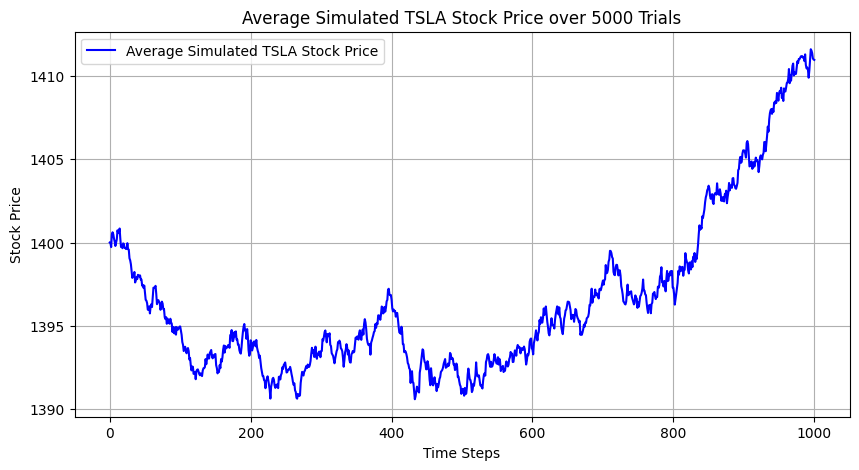

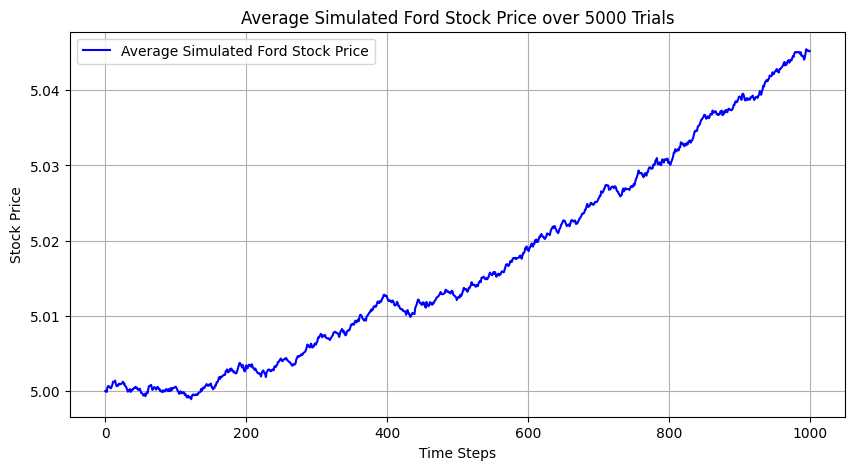

In [29]:
# Plot the average simulated stock price over the 5000 trials for TSLA Stock
average_stock_price_Tesla = np.mean(sims, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(average_stock_price_Tesla, label='Average Simulated TSLA Stock Price', color='blue')
plt.title('Average Simulated TSLA Stock Price over 5000 Trials')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

# Plot the average simulated stock price over the 5000 trials for Ford Stock
average_stock_price_Ford = np.mean(sims_f, axis=0)
plt.figure(figsize=(10, 5))
plt.plot(average_stock_price_Ford, label='Average Simulated Ford Stock Price', color='blue')
plt.title('Average Simulated Ford Stock Price over 5000 Trials')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


### Comaprison between TSLA's simulated average path against Ford:
**Decision:** The simulated average path of TSLA stock shows a gradual upward trend with moderate volatility, indicating steady growth with some risk of price swings. In comparison, the Ford stock path has a smoother progression with fewer fluctuations, suggesting a more stable but potentially slower growth. By the end of the simulation period, TSLA’s average simulated price surpasses Ford’s, implying that TSLA may have higher growth potential, though with greater volatility. Investors with a higher risk tolerance might prefer TSLA for its growth prospects, while those seeking stability might lean toward Ford.

### Q.No. 4.3 If simulations from the CRR Binomial Tree can give option prices similar to the Black-Scholes model, then why do we still use the latter? Under what situations might we prefer simulations over the Black-Scholes model?
### Answer: 
#### Reason to use the Black-Scholes Model:
While the Cox-Ross-Rubinstein (CRR) Binomial Tree model provides effective simulations for option pricing, the Black-Scholes model remains a cornerstone in the field of finance for several reasons:

**- Simplicity and Speed:** The Black-Scholes model offers a closed-form solution for pricing options, allowing traders to quickly compute option prices. This speed is crucial in fast-moving markets where timely decisions can significantly impact profitability.

**- Analytical Solution:** The ease of implementing the Black-Scholes formula makes it a practical choice for many financial professionals. Unlike simulations that can require extensive computations and iterations, the Black-Scholes model provides immediate results with minimal computational resources.

**- Well-Established Framework:** The Black-Scholes model is widely recognized and understood in the financial community. Many practitioners are familiar with its assumptions and implications, making it a preferred tool for standard options pricing.

**- Assumptions of Constant Volatility:** The model assumes constant volatility and interest rates, which simplifies the pricing process for traditional European-style options. This can be advantageous in stable market conditions where these assumptions hold true.

#### When to Prefer Simulations Over Black-Scholes
Despite its advantages, there are situations where simulations, such as the CRR Binomial Tree, are more beneficial:

**- Complex Options**: For exotic options or those with path-dependent features—like Asian options or barrier options—simulations can provide more accurate pricing. They allow for modeling various scenarios and capturing complex payoff structures.

**-Changing Volatility:** In volatile markets where conditions are not constant, simulations can incorporate shifts in volatility more effectively than the static assumptions of the Black-Scholes model. This makes them particularly useful in dynamic market environments.

**- Multiple Underlying Assets:** When pricing options on portfolios or baskets of assets, simulations can better handle the complexities of interactions and correlations between multiple underlying assets, providing a more accurate price estimation.

**- Risk Management and Stress Testing:** Simulations enable financial institutions to model extreme market scenarios and assess tail risks. This capability is essential for risk management, helping firms understand potential losses in adverse conditions.

**- Realistic Market Behavior:** Simulations can account for sudden market shocks or jumps in stock prices, which the Black-Scholes model may not adequately capture due to its underlying assumptions. This realism is vital for making informed investment decisions.